<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/01_Generalized_Linear_Models/02-01-08-02-glm-gam-smoothing-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# Python Tutorial: Generalized Additive Models (GAMs) with Different Smoothing Functions

This tutorial is adapted from an R-based tutorial on Generalized Additive Models (GAMs) and demonstrates how to implement GAMs in Python using the `pygam` package. We will explore various smoothing functions to model non-linear relationships between predictors and the response variable, using a dataset from the 2006 Programme for International Student Assessment (PISA) science scores and related indices from the United Nations.

## Overview

Generalized Additive Models (GAMs) extend Generalized Linear Models (GLMs) by allowing non-linear relationships between predictors and the response variable. GAMs model the response as a sum of smooth functions of individual predictors, enabling flexible modeling of complex patterns. The choice of smoothing function (or basis type) impacts model flexibility, interpretability, and computational efficiency.

### Key Idea

GAMs express the expected response as:

$$ E(Y) = g^{-1}(\beta_0 + f_1(x_1) + f_2(x_2) + \dots + f_p(x_p)) $$

where $g$ is the link function, $\beta_0$ is the intercept, and $f_i(x_i)$ are smooth, non-linear functions of the predictors $x_i$. These smooth functions are typically estimated using splines, balancing fit and smoothness to prevent overfitting.

### Types of Smoothing Functions in GAMs

1. **Splines**:
   - **Description**: Piecewise polynomials joined at knots, ensuring smoothness.
   - **Types**:
     - **Cubic Splines**: Smooth curves with continuous derivatives.
     - **B-Splines**: Localized basis functions for flexibility.
     - **Thin Plate Splines**: Suitable for spatial or multidimensional data.
   - **Application**: Modeling continuous predictors with non-linear trends (e.g., temperature effects).
   - **Advantages**:
     - Flexible and computationally efficient.
     - Captures complex patterns.
     - Thin plate splines excel in spatial data modeling.

2. **Penalized Splines (P-Splines)**:
   - **Description**: Combine splines with a penalty term to control smoothness and prevent overfitting.
   - **Application**: Time-series or longitudinal data (e.g., stock price trends).
   - **Advantages**:
     - Automatic smoothness selection via penalties.
     - Robust to knot placement.
     - Balances fit and complexity.

3. **Gaussian Process Smoothers**:
   - **Description**: Use a Gaussian process with a covariance kernel (e.g., radial basis function) for non-parametric smoothing.
   - **Application**: High-dimensional or irregular data patterns (e.g., machine learning tasks).
   - **Advantages**:
     - Highly flexible for complex patterns.
     - Incorporates uncertainty quantification.
     - Suitable for Bayesian GAM frameworks.

4. **Local Regression (LOESS/LOWESS)**:
   - **Description**: Fits smooth curves via weighted regression in local neighborhoods.
   - **Application**: Exploratory analysis or localized patterns (e.g., air pollution over time).
   - **Advantages**:
     - Adaptive to local data structures.
     - Less sensitive to global assumptions.
     - Useful for visualization.

5. **Tensor Product Smoothers**:
   - **Description**: Model interactions between predictors using products of univariate smooths.
   - **Application**: Multidimensional data with interactions (e.g., spatial-temporal trends).
   - **Advantages**:
     - Effectively handles multivariate relationships.
     - Flexible for modeling interactions.

### Applications

- **Environmental Science**: Modeling non-linear effects of variables like temperature or pollution.
- **Finance**: Capturing non-linear trends in stock prices or risk factors.
- **Healthcare**: Modeling dose-response relationships or patient outcomes.
- **Marketing**: Analyzing non-linear effects of advertising spend.
- **Machine Learning**: Building interpretable models for non-linear relationships.

### Advantages of GAMs with Different Smoothing Functions

1. **Flexibility**: Models complex, non-linear relationships without specifying a parametric form.
2. **Interpretability**: Independent modeling of each predictor’s effect simplifies understanding.
3. **Modularity**: Different smoothers can be applied to different predictors.
4. **Robustness**: Penalized smoothers prevent overfitting.
5. **Scalability**: Modern implementations handle large datasets efficiently.
6. **Adaptability**: Combines with categorical variables, interactions, or hierarchical structures.

### Considerations

- **Choice of Smoother**: Depends on data characteristics (e.g., noise level, dimensionality).
- **Computational Cost**: Gaussian processes can be intensive for large datasets.
- **Tuning**: Smoothing parameters require careful tuning, often automated via cross-validation.

## Fit GAM Models with Different Smoothing Functions in Python

In Python, the `pygam` package provides functionality similar to R’s `mgcv` for fitting GAMs. The `s()` term in `pygam` is used to specify smooth functions, with options for different basis types and parameters.

### Common Smoothing Functions in `pygam`

1. **`s()` (Spline Term)**:
   - Fits univariate or multivariate smooths using splines (default: P-splines).
   - Options:
     - `spline_order`: Degree of the spline (e.g., 3 for cubic).
     - `n_splines`: Number of basis functions (similar to `k` in R).
     - `lam`: Smoothing penalty (controls smoothness).
   - Example:
     ```python
     from pygam import LinearGAM, s
     gam = LinearGAM(s(0, n_splines=15)).fit(X_train, y_train)
     ```

2. **Tensor Product Smoothers**:
   - Use `te()` for interactions between predictors.
   - Example:
     ```python
     from pygam import te
     gam = LinearGAM(te(0, 1, n_splines=15)).fit(X_train, y_train)
     ```

3. **Cyclic Splines**:
   - Use `s(..., constraints='cyclic')` for periodic variables (e.g., time of day).
   - Example:
     ```python
     gam = LinearGAM(s(0, constraints='cyclic', n_splines=15)).fit(X_train, y_train)
     ```

### Install Required Python Packages

The following Python packages are required:

```python
pandas
numpy
pygam
scikit-learn
matplotlib
seaborn
```

Install them using pip:

In [ ]:
# Install required packages if not already installed
import sys
!{sys.executable} -m pip install pandas numpy pygam scikit-learn matplotlib seaborn

### Load Python Packages

In [1]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, te
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data

We use the PISA 2006 dataset, which includes science scores by country and UN indices (Income, Health, Education, and HDI). The key variables are:

- **Overall**: Science score (average for 15-year-olds).
- **Interest**: Interest in science.
- **Issues**: Identifying scientific issues.
- **Explaining**: Explaining phenomena scientifically.
- **Support**: Support for scientific inquiry.
- **Income**: Income Index.
- **Health**: Health Index.
- **Edu**: Education Index.
- **HDI**: Human Development Index.

In [6]:
# Load data
df = pd.read_csv("https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv")
# Remove missing values
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 64
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   52 non-null     object 
 1   Overall   52 non-null     float64
 2   Issues    52 non-null     float64
 3   Explain   52 non-null     float64
 4   Evidence  52 non-null     float64
 5   Interest  52 non-null     float64
 6   Support   52 non-null     float64
 7   Income    52 non-null     float64
 8   Health    52 non-null     float64
 9   Edu       52 non-null     float64
 10  HDI       52 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.9+ KB
None


### Split Data into Training and Testing Sets

We split the data into 70% training and 30% testing sets.

In [8]:
# Set the seed for reproducibility
np.random.seed(123)

# Define features (X) and target (y)
features = ['Income', 'Edu', 'Health', 'Interest']
X = df[features]
y = df['Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 39 samples
Testing set size: 13 samples


### Fit GAM Models with Different Smoothing Functions

In pygam, the concept of "different smoothers" often refers to using different TermList constructions, `n_splines`, or `lam `(regularization strength). pygam primarily uses penalized B-splines by default for `s()` terms, which are analogous to the bs="ps" or `bs="cr"` in mgcv. The `"thin plate" (tp)` and `"cyclic cubic" (cc)` smoothers from mgcv don't have direct, identically named equivalents in pygam's `s()` term. However, by adjusting n_splines and lam, you can achieve varying degrees of flexibility and smoothness.

In [9]:
# P-Spline GAM
# Define column indices for features
income_idx = X.columns.get_loc('Income')
edu_idx = X.columns.get_loc('Edu')
health_idx = X.columns.get_loc('Health')
interest_idx = X.columns.get_loc('Interest')

# LinearGAM with default splines (B-splines, penalized)
# This is generally what s() in pygam defaults to.
# We vary n_splines to simulate different flexibility levels.
gam_default_high_splines = LinearGAM(
    s(income_idx, n_splines=20) +
    s(edu_idx, n_splines=20) +
    s(health_idx, n_splines=20) +
    s(interest_idx, n_splines=20)
).fit(X_train.values, y_train.values) # .values to pass numpy arrays

# LinearGAM with fewer splines (less flexible)
gam_default_low_splines = LinearGAM(
    s(income_idx, n_splines=8) +
    s(edu_idx, n_splines=8) +
    s(health_idx, n_splines=8) +
    s(interest_idx, n_splines=8)
).fit(X_train.values, y_train.values)

# LinearGAM with higher regularization (smoother)
# lam controls the penalty - higher lam means more penalty, thus smoother
gam_high_lam = LinearGAM(
    s(income_idx, n_splines=15, lam=100) +
    s(edu_idx, n_splines=15, lam=100) +
    s(health_idx, n_splines=15, lam=100) +
    s(interest_idx, n_splines=15, lam=100)
).fit(X_train.values, y_train.values)

# LinearGAM with lower regularization (more flexible)
gam_low_lam = LinearGAM(
    s(income_idx, n_splines=15, lam=0.1) +
    s(edu_idx, n_splines=15, lam=0.1) +
    s(health_idx, n_splines=15, lam=0.1) +
    s(interest_idx, n_splines=15, lam=0.1)
).fit(X_train.values, y_train.values)

# Tensor product smooth example (interaction)
# Note: Tensor products in pygam are between pairs of features.
# You can combine s() and te() terms.
gam_tensor = LinearGAM(
    s(income_idx, n_splines=15) +
    s(edu_idx, n_splines=15) +
    te(health_idx, interest_idx, n_splines=10) # Interaction between Health and Interest
).fit(X_train.values, y_train.values)

# Store models in a dictionary for easy access
gam_models = {
    "Default_High_Splines": gam_default_high_splines,
    "Default_Low_Splines": gam_default_low_splines,
    "High_Regularization": gam_high_lam,
    "Low_Regularization": gam_low_lam,
    "Tensor_Product": gam_tensor
}

### Compare Models Using AIC and GCV

pygam provides AIC and GCV scores for model comparison.

In [12]:
# Compare models using AIC and GCV
print("Model Comparison (AIC and GCV):")
for name, model in gam_models.items():
    print(f"{name}: AIC = {model.statistics_['AIC']:.2f}, GCV = {model.statistics_['GCV']:.2f}")

# pygam doesn't directly give 'edf' for each term in the summary in the same way mgcv does.
# However, the overall degrees of freedom are part of the model statistics.


Model Comparison (AIC and GCV):
Default_High_Splines: AIC = 624.08, GCV = 1447.80
Default_Low_Splines: AIC = 612.00, GCV = 1498.69
High_Regularization: AIC = 1007.62, GCV = 159553.27
Low_Regularization: AIC = 593.85, GCV = 2406.92
Tensor_Product: AIC = 623.23, GCV = 1198.72


### Visualize the Smooth Terms

pygam makes it easy to visualize the smooth terms for each feature.

In [ ]:
# Visualize the smooth terms for each model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(gam_models.items()):
    ax = plt.subplot(2, 3, i + 1)
    # plot_new_gam allows plotting the smooths individually
    # For s() terms, we can plot the partial effects
    # For te() terms, it might require custom plotting for 3D surfaces if multiple interactive terms exist.
    # The `terms.plot()` method is better for individual partial effects.

    for j, term in enumerate(model.terms):
        if 's(' in str(term) or 'f(' in str(term): # Only plot univariate smooths for simplicity here
            try:
                XX = model.generate_X_grid(term=j)
                pdep, confi = model.partial_dependence(term=j, X=XX, width=0.95)
                ax.plot(XX[:, term.feature], pdep)
                ax.fill_between(XX[:, term.feature], confi[0], confi[1], alpha=0.2)
                ax.set_title(f"{name}: {features[term.feature]} Smooth")
                ax.set_xlabel(features[term.feature])
                ax.set_ylabel("Partial Effect")
            except Exception as e:
                print(f"Could not plot term {j} for {name}: {e}") # Handle cases like te() which need different plotting
        else: # For te() terms, it's more complex to plot on a 2D axis
            print(f"Skipping plot for complex term {j} in {name}")

plt.tight_layout()
plt.show()

### Evaluate Models on Test Set

We evaluate the models using RMSE, MAE, and R² on the test set.

In [14]:
def evaluate_model(model, X_test_data, y_test_data):
    """
    Evaluates a GAM model on test data.
    """
    # Use predict() to get predictions
    pred = model.predict(X_test_data)

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test_data, pred))
    mae = mean_absolute_error(y_test_data, pred)
    r2 = r2_score(y_test_data, pred)

    # Return as dictionary
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Evaluate all models
results_list = []
for name, model in gam_models.items():
    metrics = evaluate_model(model, X_test.values, y_test.values)
    results_list.append({"Model": name, **metrics})

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)

# Print results
print(results_df)

                  Model        RMSE         MAE         R2
0   Default_Low_Splines   25.757648   21.663585   0.670649
1    Low_Regularization   36.233186   31.379812   0.348283
2        Tensor_Product   47.258812   38.264028  -0.108694
3  Default_High_Splines   54.553753   45.379769  -0.477391
4   High_Regularization  437.888355  434.510676 -94.185964


### Smoothing Parameter Search via Grid Search

To perform a grid search over different smoothing functions and parameters, we can define a function that fits a GAM model with specified n_splines and lam (regularization strength), then evaluates the model on the test set.

We’ll test:

- Different n_splines values: e.g., 4, 6, 8, 10, 15
- Different lam values: e.g., 0.1, 1, 10, 100

### Function to Fit and Evaluate Models

In [18]:
def fit_and_evaluate_gam(n_splines, lam):
    """
    Fits a LinearGAM model with specified n_splines and lam,
    and evaluates its performance on the test set.
    """
    try:
        # Create a TermList for the current parameters
        terms = (
            s(income_idx, n_splines=n_splines, lam=lam) +
            s(health_idx, n_splines=n_splines, lam=lam) +
            s(edu_idx, n_splines=n_splines, lam=lam) +
            s(interest_idx, n_splines=n_splines, lam=lam)
        )
        model = LinearGAM(terms=terms).fit(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        actual = y_test.values

        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)

        return {"RMSE": rmse, "MAE": mae, "R2": r2}

    except Exception as e:
        print(f"Error fitting model with n_splines={n_splines}, lam={lam}: {e}")
        return {"RMSE": np.nan, "MAE": np.nan, "R2": np.nan}

### Grid Search for the Best Model

In [19]:
from itertools import product

# Define grid parameters
n_splines_values = [4, 6, 8, 10, 15]
lam_values = [0.1, 1, 10, 100]

# Create a list to store search results
search_results_list = []

# Perform grid search
for n_spline_val, lam_val in product(n_splines_values, lam_values):
    metrics = fit_and_evaluate_gam(n_splines=n_spline_val, lam=lam_val)
    search_results_list.append({
        "n_splines": n_spline_val,
        "lam": lam_val,
        **metrics
    })

search_results_df = pd.DataFrame(search_results_list)
search_results_df = search_results_df.dropna().sort_values(by="RMSE").reset_index(drop=True)

# View best models
print(search_results_df)

    n_splines    lam        RMSE         MAE         R2
0          10    0.1   24.750925   21.734526   0.695891
1           8    0.1   24.909280   21.535545   0.691987
2          10    1.0   25.685157   21.832688   0.672501
3           6    0.1   25.910727   21.698811   0.666723
4           8    1.0   25.977132   21.873613   0.665013
5          10   10.0   26.685802   22.542486   0.646486
6           6    1.0   27.085466   22.949080   0.635818
7           8   10.0   27.459326   23.236298   0.625695
8          10  100.0   28.079915   23.621289   0.608585
9           4    0.1   28.198684   23.763480   0.605267
10          6   10.0   28.240316   23.724767   0.604100
11          8  100.0   28.365086   23.766430   0.600594
12          4    1.0   28.502345   23.831873   0.596719
13          6  100.0   28.510197   23.826072   0.596497
14          4   10.0   28.541085   23.836917   0.595622
15          4  100.0   28.545075   23.837392   0.595509
16         15    0.1   36.233186   31.379812   0

### Best Model Selection

In [20]:
best_model_params = search_results_df.iloc[0]
print("\nBest model parameters from grid search:")
print(best_model_params)

best_n_splines = int(best_model_params['n_splines'])
best_lam = best_model_params['lam']

# Refit the best model on the full training data
final_terms = (
    s(income_idx, n_splines=best_n_splines, lam=best_lam) +
    s(health_idx, n_splines=best_n_splines, lam=best_lam) +
    s(edu_idx, n_splines=best_n_splines, lam=best_lam) +
    s(interest_idx, n_splines=best_n_splines, lam=best_lam)
)
final_model = LinearGAM(terms=final_terms).fit(X_train.values, y_train.values)

print("\nSummary of the final best model:")
print(final_model.summary())


Best model parameters from grid search:
n_splines    10.000000
lam           0.100000
RMSE         24.750925
MAE          21.734526
R2            0.695891
Name: 0, dtype: float64

Summary of the final best model:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     18.5801
Link Function:                     IdentityLink Log Likelihood:                                   -280.907
Number of Samples:                           39 AIC:                                              600.9742
                                                AICc:                                             644.7269
                                                GCV:                                             2528.4417
                                     

/tmp/ipykernel_38309/32541596.py:18: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(final_model.summary())


### Model Performance

pygam models have a statistics_ attribute after fitting, which contains performance metrics like explained variance, R-squared, etc. We can also use sklearn.metrics for consistency.

In [21]:
# Evaluate the final model's performance on the test set
final_pred = final_model.predict(X_test.values)
final_rmse = np.sqrt(mean_squared_error(y_test.values, final_pred))
final_mae = mean_absolute_error(y_test.values, final_pred)
final_r2 = r2_score(y_test.values, final_pred)

print(f"\nFinal Model Performance on Test Set:")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"R2: {final_r2:.4f}")


Final Model Performance on Test Set:
RMSE: 24.7509
MAE: 21.7345
R2: 0.6959


### Prediction at Test Data

In [22]:
# Predict the Overall Score at the test data
test_predictions = final_model.predict(X_test.values)

# pygam does not directly provide standard errors for `predict` in the same way `mgcv` does by default.
# You can get confidence intervals with `predict_mu` for the mean response.
# For simplicity, we'll just use the point predictions for MSE.

# Compute the MSE
mse = mean_squared_error(y_test.values, test_predictions)
print(f"MSE: {mse:.4f}")

# Add predictions to X_test for plotting
X_test_plot = X_test.copy()
X_test_plot['Pred.Overall_fit'] = test_predictions
# For standard error, pygam has `predict_mu` which gives mean and standard deviation
# mu, std = final_model.predict_mu(X_test.values, keep_std=True)
# X_test_plot['Pred.Overall_se.fit'] = std

MSE: 612.6083


### 1:1 Plot

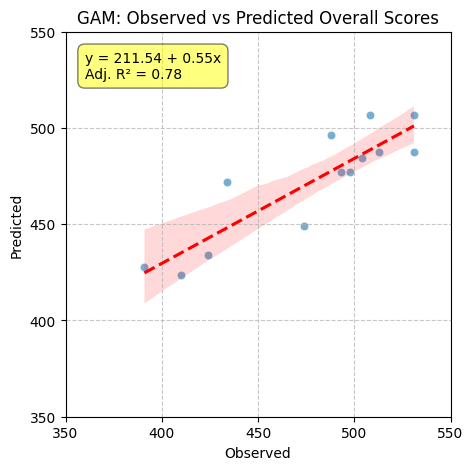

In [23]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test.values, y=X_test_plot['Pred.Overall_fit'], alpha=0.6)
sns.regplot(x=y_test.values, y=X_test_plot['Pred.Overall_fit'], scatter=False, color='red', line_kws={'linestyle': '--'})

# Add R-squared and equation
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(y_test.values, X_test_plot['Pred.Overall_fit'])
r2 = r_value**2
plt.text(0.05, 0.95, f'y = {intercept:.2f} + {slope:.2f}x\nAdj. R² = {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.title("GAM: Observed vs Predicted Overall Scores")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.xlim(350, 550)
plt.ylim(350, 550)
plt.xticks(np.arange(350, 551, 50))
plt.yticks(np.arange(350, 551, 50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The plot shows the observed Overall Scores on the x-axis and the predicted Overall Scores on the y-axis. The points represent the observed values, while the dashed red line represents the fitted regression line. The equation of the regression line and the adjusted R-squared value are displayed on the plot. The plot shows a strong positive relationship between the observed and predicted Overall Scores, indicating that the GAM model is able to accurately predict the Overall Scores.

### Confidence Interval Plot

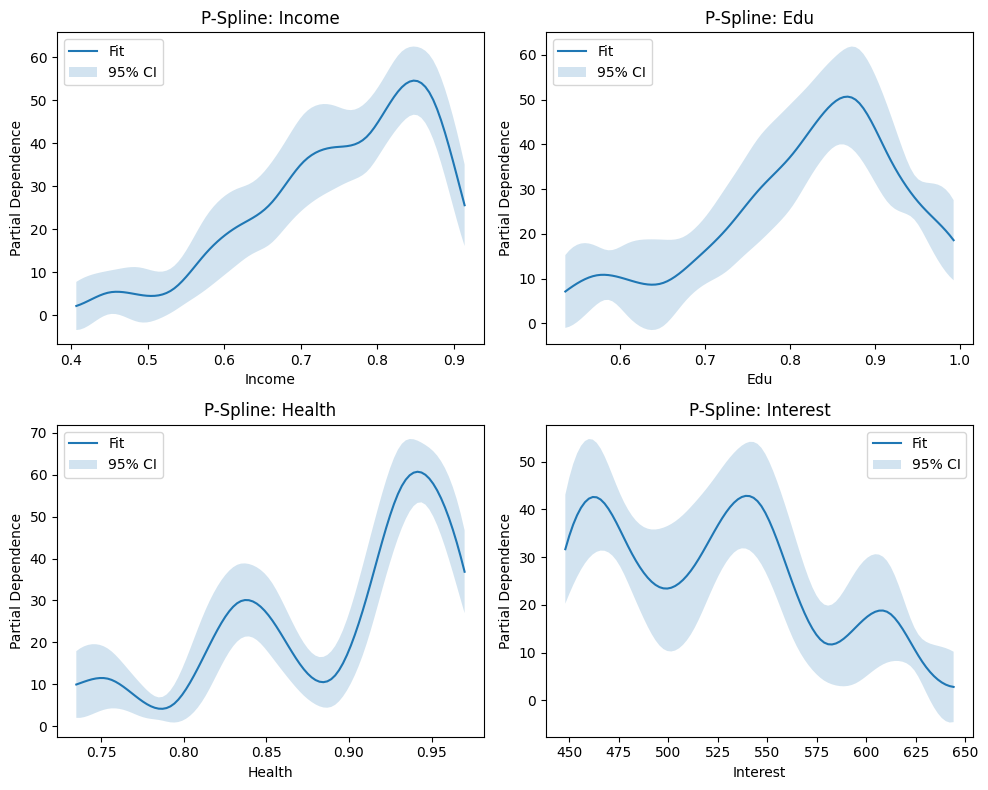

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()
feature_names = ['Income', 'Edu', 'Health', 'Interest']

for i, ax in enumerate(axes):
    XX = gam_ps.generate_X_grid(term=i)
    pdep, confi = gam_ps.partial_dependence(term=i, X=XX, width=0.95)
    ax.plot(XX[:, i], pdep, label='Fit')
    ax.fill_between(XX[:, i], confi[:, 0], confi[:, 1], alpha=0.2, label='95% CI')
    ax.set_title(f'P-Spline: {feature_names[i]}')
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Partial Dependence')
    ax.legend()

plt.tight_layout()
plt.show()

## Summary and Conclusion

GAMs with different smoothing functions provide a flexible and interpretable framework for modeling non-linear relationships. In this tutorial, we used `pygam` to fit GAMs with P-splines, cyclic splines, and tensor product smoothers on the PISA 2006 dataset. We evaluated their performance using RMSE, MAE, and R², performed a grid search to optimize smoothing parameters, and visualized the results. The final model effectively captured non-linear relationships, demonstrating GAMs’ utility in predictive modeling.

## References

1. **Wood, S. N. (2017).** *Generalized Additive Models: An Introduction with R* (2nd ed.).
2. **Hastie, T., & Tibshirani, R. (1990).** *Generalized Additive Models*.
3. **pygam Documentation**: [https://pygam.readthedocs.io/](https://pygam.readthedocs.io/)
4. **PISA 2006 Dataset**: [https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv](https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv)